In [46]:
#Install the dependencies
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
df = pd.read_csv("Stock_CSV/FB.csv") 

In [15]:
dfrev = df.iloc[::-1]
print(dfrev.head())

            date  1. open  2. high  3. low  4. close    5. volume
1972  2012-05-18    42.05    45.00   38.00   38.2318  573576400.0
1971  2012-05-21    36.53    36.66   33.00   34.0300  168192700.0
1970  2012-05-22    32.61    33.59   30.94   31.0000  101786600.0
1969  2012-05-23    31.37    32.50   31.36   32.0000   73600000.0
1968  2012-05-24    32.95    33.21   31.77   33.0300   50237200.0


In [17]:
# Get the Adjusted Close Price 
df = dfrev[['4. close']] 
# Take a look at the new data 
print(df.head())

      4. close
1972   38.2318
1971   34.0300
1970   31.0000
1969   32.0000
1968   33.0300


In [19]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['4. close']].shift(-forecast_out)
#print the new data set
print(df.tail())

   4. close  Prediction
4    149.42         NaN
3    146.96         NaN
2    153.13         NaN
1    149.73         NaN
0    148.10         NaN


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [210.11  ]
 [210.85  ]
 [212.33  ]]


In [21]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 30.771  31.2    31.47  ... 153.13  149.73  148.1  ]


In [22]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9645597728270887


In [25]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9605588439439644


In [27]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[213.06]
 [207.19]
 [210.76]
 [213.14]
 [214.18]
 [217.8 ]
 [217.49]
 [214.58]
 [210.18]
 [200.72]
 [196.77]
 [197.2 ]
 [189.75]
 [192.47]
 [196.44]
 [185.89]
 [191.76]
 [185.17]
 [181.09]
 [169.5 ]
 [178.19]
 [170.24]
 [154.47]
 [170.28]
 [146.01]
 [149.42]
 [146.96]
 [153.13]
 [149.73]
 [148.1 ]]


In [33]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)


[213.51983162 207.75949802 211.26280142 213.59833702 214.6189072
 218.17127647 217.86706805 215.01143419 210.69363729 201.41037394
 197.5341699  197.95613642 190.6453212  193.31450474 197.21033513
 186.85743574 192.61776933 186.15088715 182.14711184 170.77364227
 179.30129115 171.4998172  156.02444057 171.5390699  147.7224947
 151.0687873  148.6547463  154.70947515 151.37299572 149.77344823]


Text(0.5, 0, 'Future Days')

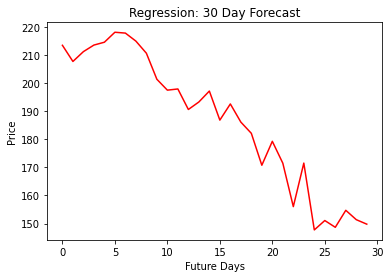

In [44]:
import matplotlib.pyplot as plt 


plt.plot(lr_prediction, color='r')


plt.title('Regression: 30 Day Forecast')
plt.ylabel('Price')
plt.xlabel('Future Days')



In [38]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[214.48026573 209.28029377 169.02230254 214.59123558 198.95158775
 170.33380048 164.4197976  187.19781622 166.5463513  200.02495991
 180.74944221 182.6903454  193.24290891 195.92372775 181.54775522
 185.74616009 204.34670807 178.95372287 182.06174201 178.82836151
 181.91945769 176.87526663 166.41385116 176.74839901 151.24766995
 160.36765971 157.56236669 164.44357084 157.70128811 165.02112224]


Text(0.5, 0, 'Future Days')

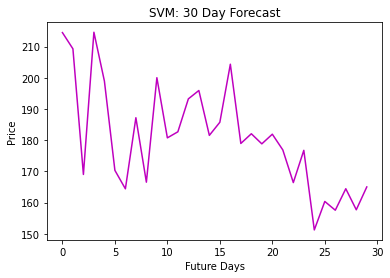

In [45]:
import matplotlib.pyplot as plt 

plt.plot(svm_prediction, color='m')

plt.title('SVM: 30 Day Forecast')
plt.ylabel('Price')
plt.xlabel('Future Days')
